In [3]:
from importlib import reload

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera
# from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle

from samples.monte_carlo import calculate_pi as cp

%matplotlib notebook

plt.style.use('ggplot')

In [10]:
class GifGenerator:
    def __init__(self):
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False, sharey=False)
        fig.set_size_inches(6, 5.5)
        fig.set_tight_layout(True)

        self.fig = fig
        self.camera = Camera(fig)
        
        self.ax1 = ax1
        self.ax2 = ax2
        
        self.ax1_xdata_in = []
        self.ax1_ydata_in = []
        
        self.ax1_xdata_out = []
        self.ax1_ydata_out = []
        
        self.ax2_xdata = []
        self.ax2_ydata = []
        
        self.pi_estimator = cp.PiEstimator()

    def prepare_for_run(self, iterations):
        self.pi_estimator.reset()
        self.ax1_xdata_in.clear()
        self.ax1_ydata_in.clear()
        
        self.ax1_xdata_out.clear()
        self.ax1_ydata_out.clear()
        
        self.ax2_xdata.clear()
        self.ax2_ydata.clear()
        

    def update(self, current_iteration, total_iterations):    
        self.ax1.set_xlim(-0.25, 1.25)
        self.ax1.set_ylim(-0.25, 1.25)

        self.ax2.set_xlim(0, total_iterations + 1)
        self.ax2.set_ylim(1.5, 4.5)

        xi, yi = self.pi_estimator.sample_point()

        if self.pi_estimator.is_point_in_circle(xi, yi):
            self.ax1_xdata_in.append(xi)
            self.ax1_ydata_in.append(yi)
        else:
            self.ax1_xdata_out.append(xi)
            self.ax1_ydata_out.append(yi)

        current_estimate = self.pi_estimator.current_pi_estimate()
        self.ax2_xdata.append(current_iteration)
        self.ax2_ydata.append(current_estimate)
        
        self.ax1.text(
            0.5, 1, 'Iteration={}, pi_estimate={:.4f}'.format(current_iteration + 1, current_estimate),
            bbox={'facecolor':'w', 'alpha':0.5, 'pad':5}, 
            transform=self.ax1.transAxes,
            ha="center",
        )
        
                
        circle = plt.Circle((0.5, 0.5), 0.5, linewidth=1, edgecolor='r', facecolor='none')
        rect = Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='b', facecolor='none')
        
        self.ax1.add_patch(circle)
        self.ax1.add_patch(rect)

        self.ax1.plot(self.ax1_xdata_in, self.ax1_ydata_in, 'r*', label='in')
        self.ax1.plot(self.ax1_xdata_out, self.ax1_ydata_out, 'b.',label='out')
        
        self.ax2.plot(self.ax2_xdata, self.ax2_ydata, 'b*', label='estimate')
        self.ax2.plot(np.arange(0, total_iterations + 1), [np.pi] * (total_iterations + 1), 'r-', label='true value')
        if current_iteration == 0:
            plt.legend()
        self.camera.snap()
    
    def create_animation(self, total_iterations):    
        for current_iteration in range(total_iterations):
            if current_iteration == 0:
                self.prepare_for_run(total_iterations)
            self.update(current_iteration, total_iterations)
            
        animation = self.camera.animate()
        return animation

<IPython.core.display.Javascript object>


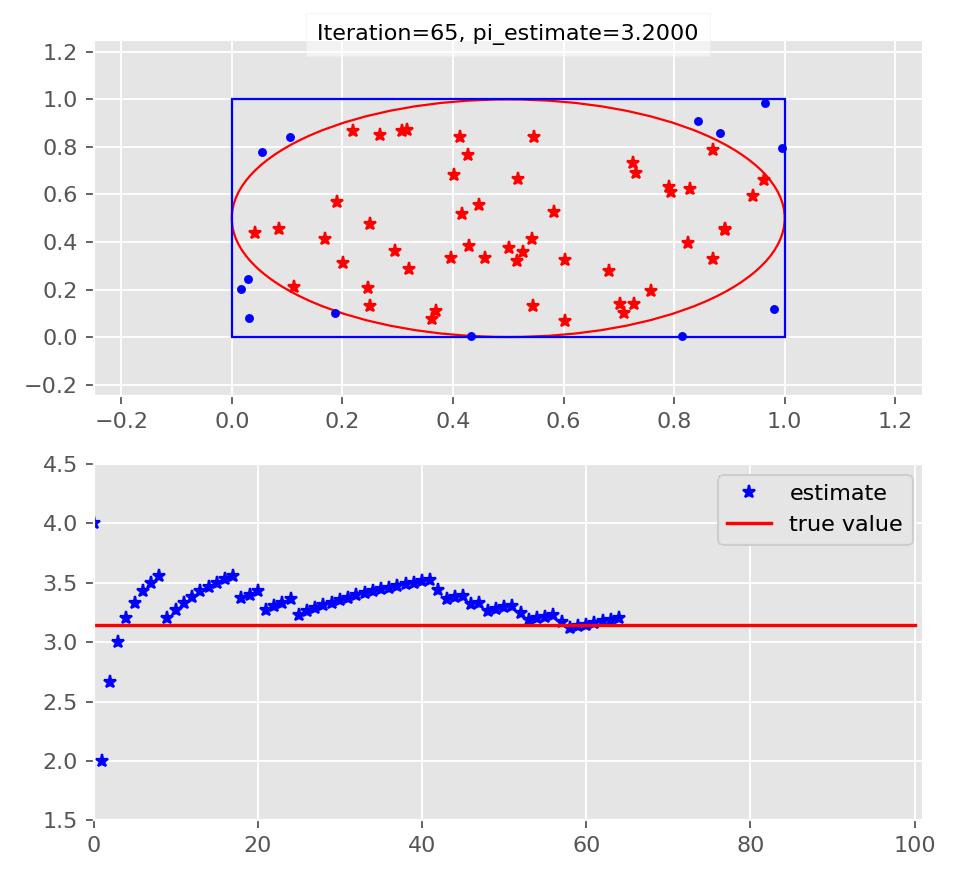

MovieWriter imagemagick unavailable; using Pillow instead.


In [11]:
gg = GifGenerator()
animation = gg.create_animation(100)
animation.save('pi.gif', writer='imagemagick')

<IPython.core.display.Javascript object>


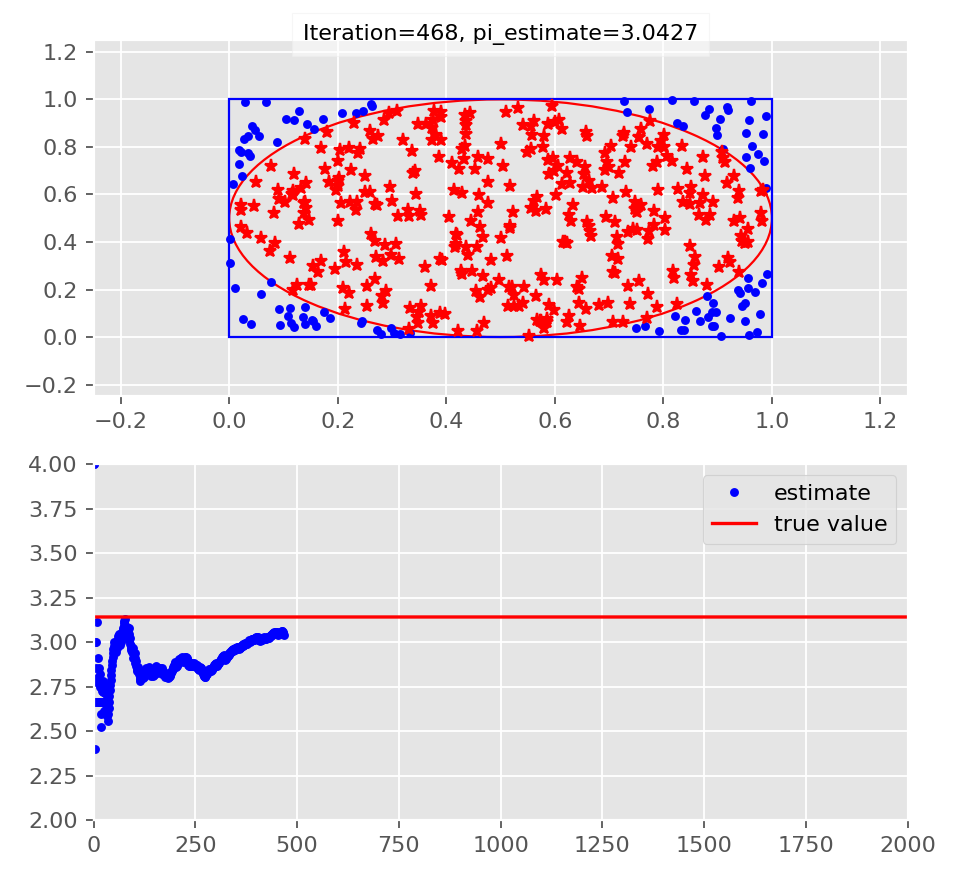

MovieWriter imagemagick unavailable; using Pillow instead.


In [22]:
fig, (ax, ax2) = plt.subplots(2, 1, sharex=False, sharey=False)
fig.set_size_inches(6, 5.5)
fig.set_tight_layout(True)
# ax.set_aspect('equal', 'datalim')

circle = plt.Circle((0.5, 0.5), 0.5, linewidth=1, edgecolor='r', facecolor='none')
rect = Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='b', facecolor='none')

ax.add_patch(circle)
ax.add_patch(rect)

xdata, ydata = [], []
xdata2, ydata2 = [], []
ln, = ax.plot([], [], 'b.', label='out')
ln2, = ax.plot([], [], 'r*', label='in')

title = ax.text(0.5, 1, '', bbox={'facecolor':'w', 'alpha':0.5, 'pad':5}, transform=ax.transAxes, ha="center")
pi_estimator = cp.PiEstimator()


iterations = 2000

ln3, = ax2.plot([], [], 'b.', label='estimate')
ax2.plot(np.arange(0, iterations), [np.pi] * iterations, 'r-', label='true value')
ax2_xdata, ax2_ydata = [], []

def init():
    ax.set_xlim(-0.25, 1.25)
    ax.set_ylim(-0.25, 1.25)

    ax2.set_xlim(0, iterations)
    ax2.set_ylim(2, 4)

def update(frame):
    if frame == 0:
        pi_estimator.reset()
        xdata.clear()
        ydata.clear()
        xdata2.clear()
        ydata2.clear()

        ax2_xdata.clear()
        ax2_ydata.clear()

    xi, yi = pi_estimator.sample_point()

    if pi_estimator.is_point_in_circle(xi, yi):
        xdata2.append(xi)
        ydata2.append(yi)
    else:
        xdata.append(xi)
        ydata.append(yi)

    current_estimate = pi_estimator.current_pi_estimate()
    ln.set_data(xdata, ydata)
    ln2.set_data(xdata2, ydata2)
    title.set_text('Iteration={}, pi_estimate={:.4f}'.format(frame + 1, current_estimate))

    ax2_xdata.append(frame)
    ax2_ydata.append(current_estimate)
    ln3.set_data(ax2_xdata, ax2_ydata)


# animation = FuncAnimation(fig, update, frames=iterations, init_func=init, blit=True, interval=0.5, repeat_delay=4000)
plt.legend()
plt.show()

# animation.save('pi_estimation.gif', dpi=30, writer='imagemagick')

In [15]:
pi_estimator = cp.PiEstimator()

In [16]:
pi_estimator.sample_points(10000)
pi_estimator.current_pi_estimate()

3.1432

In [17]:
pi_estimator.sample_points(10000)
pi_estimator.current_pi_estimate()

3.142

In [18]:
pi_estimator.sample_points(10000)
pi_estimator.current_pi_estimate()

3.1397333333333335

In [19]:
pi_estimator.sample_points(10000)
pi_estimator.current_pi_estimate()

3.1407